# Week 2 - Implementation of Shaffer et al

In [5]:
# This line tells matplotlib to include plots here
%matplotlib inline
import pandas as pd
import numpy as np # We'll need numpy later
from scipy.stats import kstest, ttest_ind, ks_2samp, zscore
import matplotlib.pyplot as plt # This lets us access the pyplot functions
#import sys 
#!{sys.executable} -m pip install tabulate
from tabulate import tabulate

import os
from sklearn.datasets import make_blobs

## (1) Estimation of a sample mean from a normally distributed variable.

Let us assume that a true distribution of a process is described by the normal distribution with $\mu=5$ and $\sigma=1$. You have a measurement technique that allows you to sample n points from this distribution. In Python we can use a random number generator whose numbers will be chosen from the desired normal distribution by using the function `np.random.normal`. Sample from this normal distribution from n=1 to 50 (i.e. n=1:50). Create a plot for the standard deviation of the calculated mean from each n when you repeat the sampling 1000 times each. (i.e. You will repeat your n observations 1000 times and will calculate the sample mean for each of the 1000 trials).

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35. 36.
 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50.]


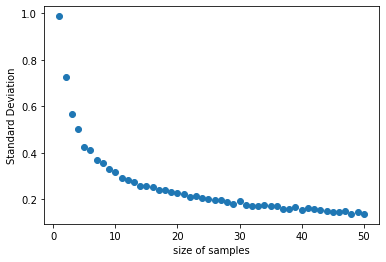

In [10]:

mu = 5
sigma = 1
sample_mean = np.zeros((50,1000))
std = np.zeros(50)

for n in range(50):
    for trial in range(1000):
        sample = np.random.normal(5,1,n+1)
        sample_mean[n][trial] = np.mean(sample)

for i in range(50): 
    std[i] = np.std(sample_mean[i][:])

line = np.linspace(1,50,50)

print(line)

plt.xlabel('size of samples')
plt.ylabel('Standard Deviation')
plt.scatter(line,std)




Text(0.5, 0, 'oligomer')

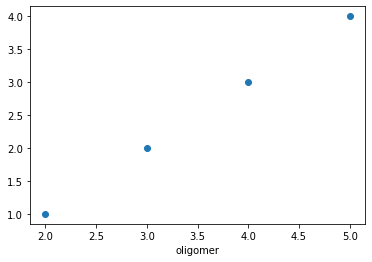

In [9]:
y = [1,2,3,4]
x = [2,3,4,5]
plt.scatter(x,y)
plt.xlabel('oligomer')


#### 1a. Plot the standard deviation of the sample mean versus n. Add a second line which is 1/sqrt(n). Describe what this tells you about the relationship between n and your power to estimate the underlying mean.

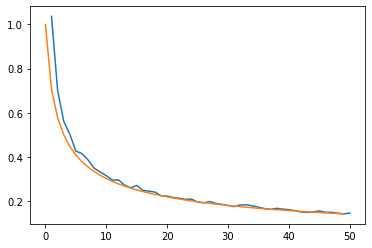

In [129]:
x = np.linspace(1,50)
plt.plot(x,std,1/np.sqrt(x))

#As n increases, the ability to estimate the underlying mean increases. 

#### 1b. Plot the boxplot for the sample means for all values n. Using words, interpret what the boxplot view of the 1000 trials for n=1 means and what the trends in the boxplot demonstrate compared to the plot in 1a. What information do you gain or lose in the two different plotting schemes?

[[3.7581508  3.00084379 4.34517723 ... 5.8663979  4.88392701 5.63939785]
 [5.40256713 5.11408126 5.52355857 ... 4.59859426 5.10005105 5.10919765]
 [2.86118792 5.86545817 5.23728732 ... 5.092581   5.44593662 4.96470492]
 ...
 [4.96747815 4.84526706 5.3832495  ... 4.92177031 5.00674634 5.02626239]
 [4.8571286  4.84553796 4.92358738 ... 4.94206714 4.81668026 5.14741632]
 [4.99544026 4.89104276 4.73156851 ... 4.96973525 5.266773   4.91461632]]


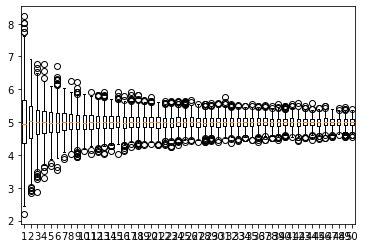

In [11]:
plt.boxplot(sample_mean.T)
print(sample_mean)

#Box plots are better for knowing if the distribution is symmetric or skewed, while histograms gain us the ability 
#to determine and visualize the probability distribution. The boxplot view of the 1000 trials for n=1 indicates the distribution
#is pretty centered, as opposed to skewed. 


#### 1c. For n=3, plot the histogram of the mean for the 1000 trials. Use the Kolmogorov-Smirnov test to see if this sample distribution is normal. (Hint: You may need to translate this to the *standard* normal distribution.) Report the sample mean and sample standard deviation, the p-value from the test, and whether you would reject the null hypothesis.

KstestResult(statistic=0.014900715606171788, pvalue=0.9771034575824944)

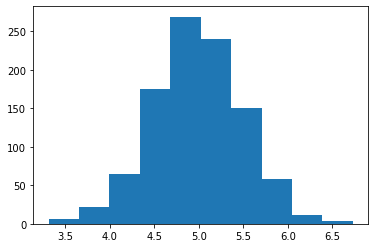

In [94]:
plt.hist(sample_mean[3][:])
standard_normal = zscore(sample_mean[3])
kstest(standard_normal,'norm')


#Since the p-value is .990, there is a 99% chance that the deviation
#between sample means is not significant, so I wouldn't reject the null hypothesis. 

#### 1d. Repeat 1c but for n=20. What changes when the number of samples increases?

KstestResult(statistic=0.022964597737608394, pvalue=0.6585284488740679)

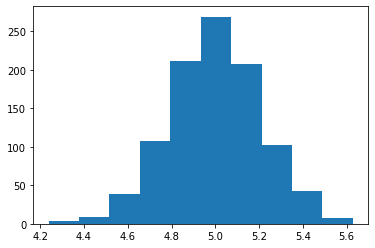

In [100]:
plt.hist(sample_mean[20][:])
standard_normal2 = zscore(sample_mean[3])
kstest(standard_normal2,'norm')
#As the number of samples increases, the p-value decreases. Since the p-value is greater than 0.05 I would also fail to
#reject null hypothesis in this case. 

## (2) Now we will explore sampling from an alternate distribution type.

#### 2a. Sample the Pareto distribution (`np.random.pareto`) with parameter shape = 2, 1000 times. Plot the histogram of these values. Describe the shape of this histogram in words. Is it anything like the normal distribution?

(array([891.,  98.,   8.,   2.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([0.46651152, 1.3455027 , 2.22449388, 3.10348505, 3.98247623,
        4.8614674 , 5.74045858, 6.61944975, 7.49844093, 8.3774321 ,
        9.25642328]),
 <BarContainer object of 10 artists>)

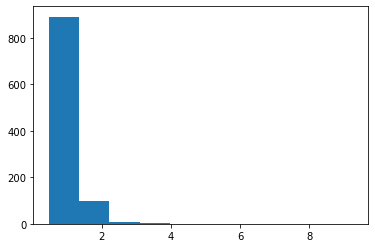

In [419]:
sample_mean2 = np.zeros((1000))

for i in range(1000):
    sample_mean2[i] = np.mean(np.random.pareto(2,50))

plt.hist(sample_mean2)

#The distribution is unevenly shaped, and it's unlike a normal distribution that is centered at the mean. 

#### 2b. As in problem 1, plot a boxplot of the sample distribution from n=1:50. How does this differ from the plot in 1b and why? Plot the standard deviations of the sample means versus n. Is this any different?

In [2]:
sample_mean2 = np.zeros((50,1000))
std1 = np.zeros(50)

for n in range(50):
    for trial in range(1000):
        sample_mean2[n,trial] = np.mean(np.random.pareto(2,n+1))
        
for i in range(50): 
    std1[i] = np.std(sample_mean2[i][:])

line = np.linspace(1,50,50)

plt.xlabel('Size of the Samples')
plt.ylabel('Standard Deviation')
plt.scatter(line,std1)

#The boxplot of 2b is different than 1b largely because the upper to lower quartile are a lot closer to the lower whisker. 
#The scatter plot of 2b has a lot more outliers than the scatter plot of 1a. 

NameError: name 'np' is not defined

{'whiskers': [<matplotlib.lines.Line2D at 0x20e06c58>,
 'caps': [<matplotlib.lines.Line2D at 0x20e06fb8>,
 'boxes': [<matplotlib.lines.Line2D at 0x20e06aa8>,
 'medians': [<matplotlib.lines.Line2D at 0x20e16340>,
 'fliers': [<matplotlib.lines.Line2D at 0x20e164f0>,
 'means': []}

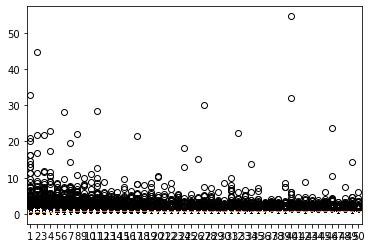

In [520]:
plt.boxplot(sample_mean2.T)

#### 2c. For n=3, plot the histogram of the sample means. What is this distribution—Pareto or normal? Report your test results.

KstestResult(statistic=0.22880385026344824, pvalue=1.690855701386019e-46)

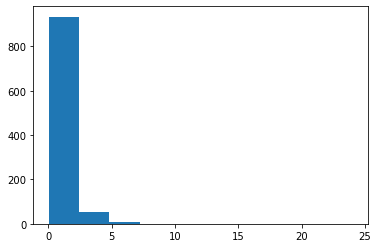

In [103]:
sample_mean3 = np.zeros(1000)
n = 3
for trial in range(1000):
        sample_mean3[trial] = np.mean(np.random.pareto(2,n))
plt.hist(sample_mean3)

zeescore = zscore(sample_mean3)
kstest(zeescore,'norm')
#This distribution is a pareto distribution. 

#### 2d. Repeat 2b and 2c for n=100.

KstestResult(statistic=0.22403727008308671, pvalue=1.4077568703643737e-44)

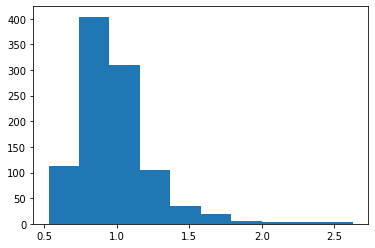

In [309]:
sample_mean100 = np.zeros(1000)
n = 100
for trial in range(1000):
        sample_mean100[trial] = np.mean(np.random.pareto(2,n+1))
plt.hist(sample_mean100)

zeescore = zscore(sample_mean3)
kstest(zeescore,'norm')

{'whiskers': [<matplotlib.lines.Line2D at 0x14e9a370>,
 'caps': [<matplotlib.lines.Line2D at 0x14e9a6d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x14e9a1d8>],
 'medians': [<matplotlib.lines.Line2D at 0x14e9aa30>],
 'fliers': [<matplotlib.lines.Line2D at 0x14e9abc8>],
 'means': []}

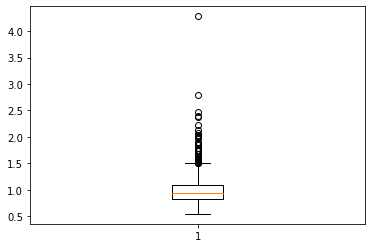

In [308]:
plt.boxplot(sample_mean100.T)

## (3) Differential expression. In this problem you will use the two-sample t-test to explore what differential hypothesis testing looks like in known standards and how multiple hypothesis correction effects the number of false positives and negatives from these tests.
- Distribution 1, normal with mu=1, sigma=1
- Distribution 2, normal with mu=3, sigma=1

#### 3a. False Negative: Using n=3, perform 100 comparisons of distribution 1 versus distribution 2 with an alpha=0.05. Anytime you fail to reject the hypothesis it is a false negative. Why is this a false negative? Report the number of false negatives from your 100 tests.

Hint: It'd be helpful to define a function that does this for you at this point.

In [86]:
ttest = np.zeros(100)
falsenegative = 0

for i in range(100):
    distribution1 = np.random.normal(1,1,3)
    distribution2 = np.random.normal(3,1,3)
    ttest = ttest_ind(distribution1,distribution2)[1]
    if ttest>0.05: 
        falsenegative = falsenegative+1 
print('The number of false negatives is:',falsenegative)

#This is a false negative because we aren't rejecting the null hypothesis when we should be rejecting it. Hence, it is 
#incorrectly stating that the data found is insignifant. 

The number of false negatives is: 48


#### 3b. False Positives: Using n=3, perform 100 comparisons of distribution 1 versus distribution 1 with an alpha=0.05. Anytime you reject the hypothesis this is a false positive. Why is this a false positive? Report the number of false positives from your 100 tests.

In [87]:
ttestb = np.zeros(100)
falsepositive = 0

for i in range(100):
    distribution1 = np.random.normal(1,1,3)
    distribution2 = np.random.normal(1,1,3)
    ttestb = ttest_ind(distribution1,distribution2)[1]
    if ttestb<=0.05: 
        falsepositive = falsepositive+1 
print('The number of false positives is:',falsepositive)
#This is a false positive because we are rejecting our null hypothesis when we should be accepting it, it is saying that 
#the data is significant when it isn't. 

The number of false positives is: 2


#### 3c. Repeat 3b but 1000 times. What is the number of false positives? Predict the number of false positives you would get if you compared samples from the same distribution 10,000 times and explain why.

In [81]:
ttestb = np.zeros(1000)
falsepositive = 0

for i in range(1000):
    distribution1 = np.random.normal(1,1,3)
    distribution2 = np.random.normal(1,1,3)
    ttestb = ttest_ind(distribution1,distribution2)[1]
    if ttestb<=0.05: 
        falsepositive = falsepositive+1 
print('the number of false positives is:',falsepositive)

#If I was comparing samples 10,000 times I would think that the number of false positives would increase by a factor of 10
#to around 500, since we are increasing our number of tests by a factor of 10. 

53


#### 3d. Now sweep n from 3 to 30 and report the number of false positives and false negatives for each n when you run 100 comparisons. (Provide this in a table format). Please explain the trend you see and interpret its meaning.

In [177]:
ttestb = np.zeros(100)
falsepositive = np.zeros(28)
for n in range(0,28):
    for i in range(100):
        distribution1 = np.random.normal(1,1,n+3)
        distribution2 = np.random.normal(1,1,n+3)
        ttestb = ttest_ind(distribution1,distribution2)[1]
        if ttestb<=0.05: 
            falsepositive[n] = falsepositive[n]+1 

ttest = np.zeros(100)
falsenegative = np.zeros(28)
for n in range(0,28):
    for i in range(100):
        distribution1 = np.random.normal(1,1,n+3)
        distribution2 = np.random.normal(3,1,n+3)
        ttest = ttest_ind(distribution1,distribution2)[1]
        if ttest>.05: 
            falsenegative[n] = falsenegative[n]+1 

ss = list(range(3, 31))
headers = ['Sample Size','False Positive','False Negative']

table = zip(ss,falsepositive,falsenegative)
print(tabulate(table,headers=headers,floatfmt=".4f"))


#We can see that the false positive rate is completely unaffected by changes in n. On the other hand, the false negative 
#values decrease with an increase in n since a greater sample size increases the sensitivity and power of the test. 

  Sample Size    False Positive    False Negative
-------------  ----------------  ----------------
            3            4.0000           50.0000
            4            4.0000           33.0000
            5            4.0000           20.0000
            6            7.0000            7.0000
            7            5.0000            3.0000
            8            9.0000            4.0000
            9           10.0000            3.0000
           10            3.0000            1.0000
           11            6.0000            1.0000
           12            3.0000            0.0000
           13            5.0000            0.0000
           14            5.0000            0.0000
           15            4.0000            0.0000
           16            3.0000            0.0000
           17            4.0000            0.0000
           18            5.0000            0.0000
           19            5.0000            0.0000
           20            7.0000            0.0000


#### 3e. For n=3, suggest how the number of false negatives changes according to sigma for the two distributions and test this. Report your new values and sigma and the number of false negatives in 100 tests.

In [168]:
ttest = np.zeros(100)
falsenegative = np.zeros(30)
for sigma in range(30):
    for i in range(100):
        distribution1 = np.random.normal(1,sigma+1,3)
        distribution2 = np.random.normal(3,sigma+1,3)
        ttest = ttest_ind(distribution1,distribution2)[1]
        if ttest>=0.05: 
            falsenegative[sigma] = falsenegative[sigma]+1 



sigma = list(range(1, 30))
headers = ['Sigma','False Negative']

table = zip(sigma,falsenegative)
print(tabulate(table,headers=headers,floatfmt=".4f"))

#This suggests that the number of false negatives increases with a higher sigma. 

  Sigma    False Negative
-------  ----------------
      1           54.0000
      2           86.0000
      3           90.0000
      4           95.0000
      5           89.0000
      6           93.0000
      7           98.0000
      8           91.0000
      9           97.0000
     10           98.0000
     11           95.0000
     12           93.0000
     13           97.0000
     14           96.0000
     15           96.0000
     16           88.0000
     17           94.0000
     18           99.0000
     19           92.0000
     20           93.0000
     21           94.0000
     22           97.0000
     23           96.0000
     24           97.0000
     25           98.0000
     26           92.0000
     27           95.0000
     28           99.0000
     29           96.0000


#### 3f. Lastly, perform 3d for p < 0.01 instead of p < 0.05. How does this influence the rate of false positives and negatives? How might you use this when performing many tests?

In [176]:
ttestb = np.zeros(100)
falsepositive = np.zeros(28)
for n in range(0,28):
    for i in range(100):
        distribution1 = np.random.normal(1,1,n+3)
        distribution2 = np.random.normal(1,1,n+3)
        ttestb = ttest_ind(distribution1,distribution2)[1]
        if ttestb<=0.01: 
            falsepositive[n] = falsepositive[n]+1

ttest = np.zeros(100)
falsenegative = np.zeros(28)
for n in range(0,28):
    for i in range(100):
        distribution1 = np.random.normal(1,1,n+3)
        distribution2 = np.random.normal(3,1,n+3)
        ttest = ttest_ind(distribution1,distribution2)[1]
        if ttest>.01: 
            falsenegative[n] = falsenegative[n]+1 

ss = list(range(3, 31))
headers = ['Sample Size','False Positive','False Negative']

table = zip(ss,falsepositive,falsenegative)
print(tabulate(table,headers=headers,floatfmt=".4f"))
#With p<0.01, we get a much lower value of false positives, and a higher rate of false negatives. 

  Sample Size    False Positive    False Negative
-------------  ----------------  ----------------
            3            2.0000           90.0000
            4            0.0000           71.0000
            5            0.0000           59.0000
            6            1.0000           33.0000
            7            0.0000           28.0000
            8            0.0000           18.0000
            9            0.0000           11.0000
           10            0.0000            8.0000
           11            1.0000            4.0000
           12            0.0000            2.0000
           13            1.0000            3.0000
           14            2.0000            0.0000
           15            1.0000            0.0000
           16            2.0000            0.0000
           17            1.0000            0.0000
           18            0.0000            0.0000
           19            0.0000            0.0000
           20            1.0000            0.0000


## (4) Power analysis

Now that we've observed the trends above, we have all the tools to talk about power analysis. Power analysis is an essential step when designing an experiment, and asks *assuming we should be rejecting the null hypothesis, what is the probability we will do so*. The power of an experiment is equal to 1 minus the false negative rate. A common choice for the power of an experiment (like a p-value cutoff of 0.05) is 0.8.

#### 4a. Power analysis is often used to determine the necessary N of an experiment. Why might this be used as opposed to the false positive rate?

We want to use power analysis as opposed to the false positive rate because the false positive rate is independent of N, the sample size. 



#### 4b. Determine the necessary N to acheive a power of 0.8 from the situation in (3).

In [571]:
#The necessary N to achieve a power of 0.8 in situation 3a, is n=6.

ttest = np.zeros(100)
falsenegative = 0

for i in range(100):
    distribution1 = np.random.normal(1,1,6)
    distribution2 = np.random.normal(3,1,6)
    ttest = ttest_ind(distribution1,distribution2)[1]
    if ttest>0.05: 
        falsenegative = falsenegative+1 
print(falsenegative)


14


## (5) Shaffer et al

In this excercise we're going to explore some basic concepts of statistics, and use them to build up to some more advanced ideas. To examine these ideas we're going to consider a classic of molecular biology—the [Luria-Delbrück experiment](https://en.wikipedia.org/wiki/Luria–Delbrück_experiment). The data we'll use is from [Shaffer et al](https://www.nature.com/articles/nature22794).

In [23]:
repOne = np.array([259, 213, 182, 167, 254, 221, 236, 168, 190, 262, 285, 158, 240, 187, 326, 116, 220, 309, 181, 268, 285, 467, 121, 177, 188, 116, 218, 195, 260, 307, 213, 314, 220, 245, 325, 220, 222, 336, 60, 268, 252, 112, 252])
repTwo = np.array([28, 72, 53, 103, 46, 90, 105, 78, 86, 127, 30, 52, 105, 111, 88, 35, 23, 119, 89, 110, 138, 79, 118, 107, 38, 71, 104, 61, 125])

#### 5a. First, we need to build up a distribution of outcomes for what an experiment would look like if it followed the Luria-Delbruck process.
Fill in the function below keeping track of normal and mutant cells. Then, make a second function, `CVofNRuns`, that runs the experiment 3000 times. You can assume a culture size of 120000 cells, and mutation rate of 0.0001 per cell per generation. What does the distribution of outcomes look like?

In [29]:
# Runs the simulation a bunch of times, and looks for how often the fano (cv/mean) comes out to one side

def simLuriaDelbruck(cultureSize, mutationRate):
    nCells, nMuts = 1, 0  # Start with 1 non-resistant cell

    for _ in range(int(np.floor(np.log2(cultureSize)))):  # num of gens
        nCells =  nCells*2
        newMuts = np.random.poisson(nCells * mutationRate)  # de novo
        nMuts = (2*nMuts)+newMuts     # Previous mutants divide and add
        nCells = nCells - newMuts      # Non-resistant pop goes down by newMuts

    return nMuts
simLuriaDelbruck(12000,0.0001)

9

(array([2.977e+03, 1.200e+01, 5.000e+00, 0.000e+00, 0.000e+00, 4.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00]),
 array([3.00000e+00, 1.64390e+03, 3.28480e+03, 4.92570e+03, 6.56660e+03,
        8.20750e+03, 9.84840e+03, 1.14893e+04, 1.31302e+04, 1.47711e+04,
        1.64120e+04]),
 <BarContainer object of 10 artists>)

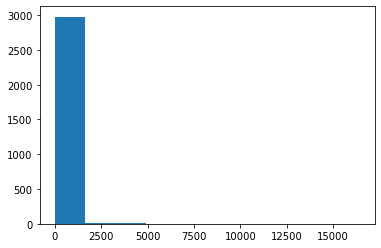

In [30]:
def CVofNRuns(runs,cultureSize,mutationRate):
    trial=np.zeros(runs)
    for i in range(runs):
        trial[i] = simLuriaDelbruck(cultureSize,mutationRate)
    return trial
    
l = CVofNRuns(3000,120000,.0001)
plt.hist(l)

#### 5b. Compare the distribution of outcomes between the two replicates of the experiment using the 2-sample KS test. Are they consistent with one another?
Hint: Each experiment varies slightly in the amount of time it was run. The absolute values of the numbers doesn't matter, so much as the variation of them. You'll need to correct for this by dividing by the mean of the results.

In [150]:
repOne = repOne/np.mean(repOne)
repTwo = repTwo/np.mean(repTwo)
ttest = ks_2samp(repOne,repTwo)

print(ttest)

#Yes the distributions are consistent with each other. 
#Our p-value is greater than 0.05 so our null hypothesis is not rejected. 


KstestResult(statistic=0.25100240577385724, pvalue=0.17846555487320592)


#### 5c. Compare the distribution of outcomes between the experiment and model. Are our results consistent with resistance arising through a Luria-Delbruck related process?

In [151]:

l = l/np.mean(l)
repTwo = repTwo/np.mean(repTwo)
ttest = ks_2samp(l,repTwo)

print(ttest)
#No our results are not consistent with the Luria-Delbruck process. 
#The p-value is less than 0.05 so the null hypothesis is rejected. 

KstestResult(statistic=0.5321034482758621, pvalue=4.0855568705921996e-08)


#### 5d. We assumed a specific mutation rate and final number of cells. How might you show whether or not these parameters influence our results?

We could test out if mutation rate and the final number of cells influences our results by changing the information inputted into the simLuriaDelbruck funcion in part 5a. 